<a href="https://colab.research.google.com/github/nkatara/iiit-ai-ml/blob/main/Demo_DT_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grading

### Learning Objective

The objective of this experiment is to:

* understand Decision tree classifier
* visualize the decision boundaries
* understand overfitting

### Dataset

Two handmade datasets (A,B) are chosen for this experiment

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2501952" #@param {type:"string"}


In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8439328088" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "Demo_DT_Overfitting" #name of the notebook
Answer = "Ungraded"
def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/A.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/B.csv.zip")
    ipython.magic("sx unzip B.csv.zip")
    display(HTML('<script src="https://dashboard.talentsprint.com/submissions/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():

    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword(), "batch" : ""}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts() and getComments():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook, "batch" : ""}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()

else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


After upgrade of mlxtend click on restart runtime in order to use newly installed versions.

In [4]:
!pip install mlxtend --upgrade --no-deps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


## Import the required packages

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

###  Consider A as train data and B as test data

In [6]:
A_train = pd.read_csv("A.csv")
A_train.head()

,X,Y,Label
0,4.82,8.14,0
1,5.02,3.84,1
2,4.69,9.63,0
3,8.44,3.22,1
4,1.41,5.44,0


In [7]:
B_test = pd.read_csv("B.csv", names=['X', 'Y', 'Label'])
B_test.head()

,X,Y,Label
0,5.46,9.92,0
1,6.22,4.87,1
2,4.98,8.42,0
3,6.35,6.54,1
4,2.54,7.45,0


### Visualize the data to get more sense of data


Matplotlib has a number of built-in colormaps using cmap, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)

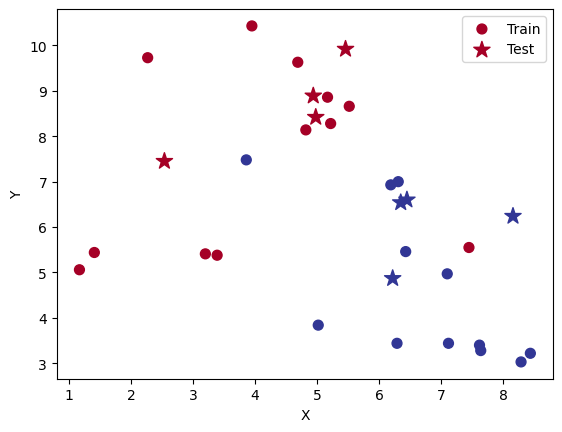

In [8]:
plt.scatter(A_train.X, A_train.Y, c= A_train.Label, cmap='RdYlBu', s=50, label="Train") # s is marker size
plt.scatter(B_test.X, B_test.Y, c=B_test.Label, cmap='RdYlBu', marker="*", s=150, label="Test")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [9]:
# Get the train and test sets from the data
X_train, y_train = A_train[['X','Y']].values, A_train['Label'].values
X_test, y_test = B_test[['X','Y']].values, B_test['Label'].values

### Train and Visualize a Decision Tree Classifier at each depth

Training Accuracy: 0.88 Testing Accuracy: 1.0 At Depth: 1


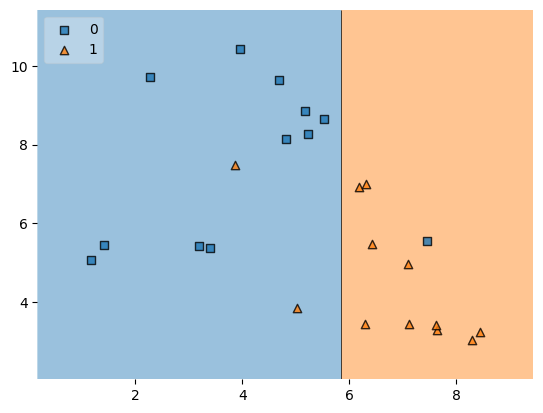

Training Accuracy: 0.92 Testing Accuracy: 1.0 At Depth: 2


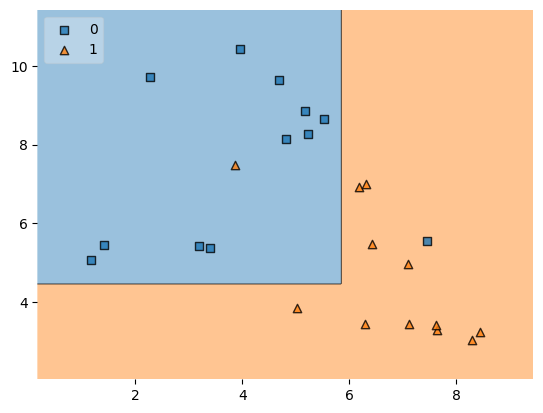

Training Accuracy: 0.96 Testing Accuracy: 0.88 At Depth: 3


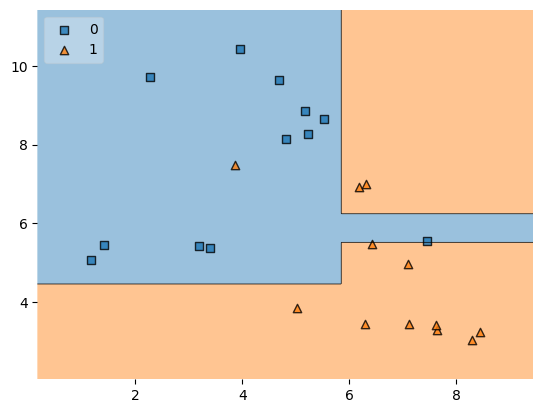

Training Accuracy: 1.0 Testing Accuracy: 0.88 At Depth: 4


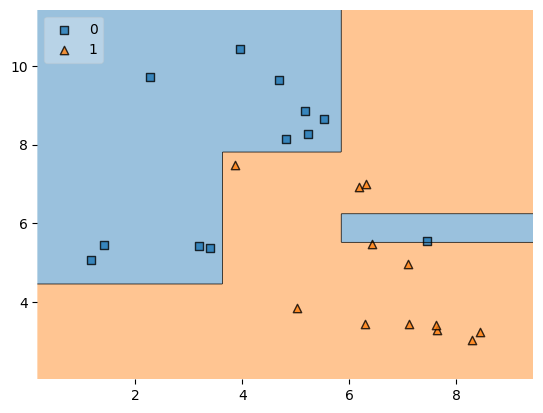

In [10]:
# Training a decision tree classifier at each depth

for depth in range(1,5):

        # max_depth parameter regularize the tree, or limit the way it grows to prevent over-fitting
        clf = DecisionTreeClassifier(criterion='gini', max_depth = depth)
        clf = clf.fit(X_train, y_train)
        training_acc = accuracy_score(clf.predict(X_train),y_train)
        testing_acc = accuracy_score(clf.predict(X_test),y_test)
        print("Training Accuracy: "+str(round(training_acc,2)) + " " +  "Testing Accuracy: " + str(round(testing_acc,2)) + " " +
              "At Depth: " + str(depth))
        plot_decision_regions(X_train, y_train, clf=clf, legend=2)
        plt.show()

### Please answer the questions below to complete the experiment:




In [11]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [12]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}


In [13]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [14]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [15]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [16]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [17]:
#@title Run this cell to submit your notebook for Ungrading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 4388
Date of submission:  14 Dec 2025
Time of submission:  13:16:02
View your submissions: https://learn-iiith.talentsprint.com/notebook_submissions
